<a href="https://colab.research.google.com/github/Afaq0456/Anomaly-detection-in-IoT-security-IOT-23-dataset/blob/main/iot_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Downloading steps with API**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d astralfate/iot23-dataset

 72% 7.00M/9.75M [00:00<00:00, 13.9MB/s]
100% 9.75M/9.75M [00:00<00:00, 12.5MB/s]


In [4]:
!unzip iot23-dataset.zip

Archive:  iot23-dataset.zip
  inflating: cleaned_data.csv        
  inflating: iot23_combined.csv      


#**Dataset overview**

In [5]:
filepath = "iot23_combined.csv"

In [6]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv(filepath)

In [ ]:

print("\nSummary statistics for numerical columns:")
print(df.describe())

# Check missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())



Summary statistics for numerical columns:
         Unnamed: 0            ts      duration    orig_bytes    resp_bytes  \
count  1.446621e+06  1.446621e+06  1.446621e+06  1.446621e+06  1.446621e+06   
mean   4.862443e+04  1.543353e+09  4.651002e-01  2.726938e+03  2.555288e+02   
std    2.940374e+04  1.113017e+07  1.243028e+02  1.713612e+06  2.799788e+05   
min    0.000000e+00  1.525880e+09 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%    2.254400e+04  1.532526e+09 -1.000000e+00 -1.000000e+00 -1.000000e+00   
50%    4.833300e+04  1.545403e+09  0.000000e+00  0.000000e+00  0.000000e+00   
75%    7.416600e+04  1.551378e+09  0.000000e+00  0.000000e+00  0.000000e+00   
max    9.999800e+04  1.569018e+09  7.884033e+04  1.744830e+09  3.365164e+08   

       missed_bytes     orig_pkts  orig_ip_bytes     resp_pkts  resp_ip_bytes  \
count  1.446621e+06  1.446621e+06   1.446621e+06  1.446621e+06   1.446621e+06   
mean   2.127910e-01  1.779219e+02   7.746255e+03  3.060421e-01   2.763200e+02   
st

In [ ]:
print(df.head())

   Unnamed: 0            ts      id.orig_h    duration  orig_bytes  \
0           0  1.540470e+09  192.168.1.132    0.003497           0   
1           1  1.540470e+09  192.168.1.132    0.036724          34   
2           2  1.540469e+09  192.168.1.132  384.518261       15072   
3           3  1.540470e+09  192.168.1.132    0.270332          48   
4           4  1.540470e+09  192.168.1.132    0.111429          48   

   resp_bytes  missed_bytes  orig_pkts  orig_ip_bytes  resp_pkts  ...  \
0           0           0.0        5.0          212.0        3.0  ...   
1         311           0.0        1.0           62.0        1.0  ...   
2           0           0.0       48.0        16416.0        0.0  ...   
3          48           0.0        1.0           76.0        1.0  ...   
4          48           0.0        1.0           76.0        1.0  ...   

   conn_state_RSTOS0 conn_state_RSTR  conn_state_RSTRH  conn_state_S0  \
0                  0               0                 0             

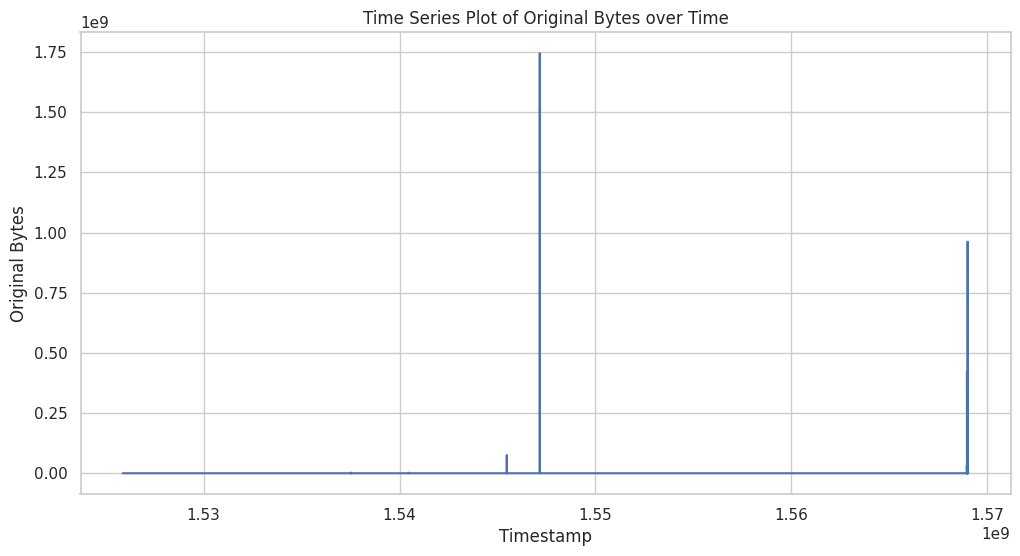

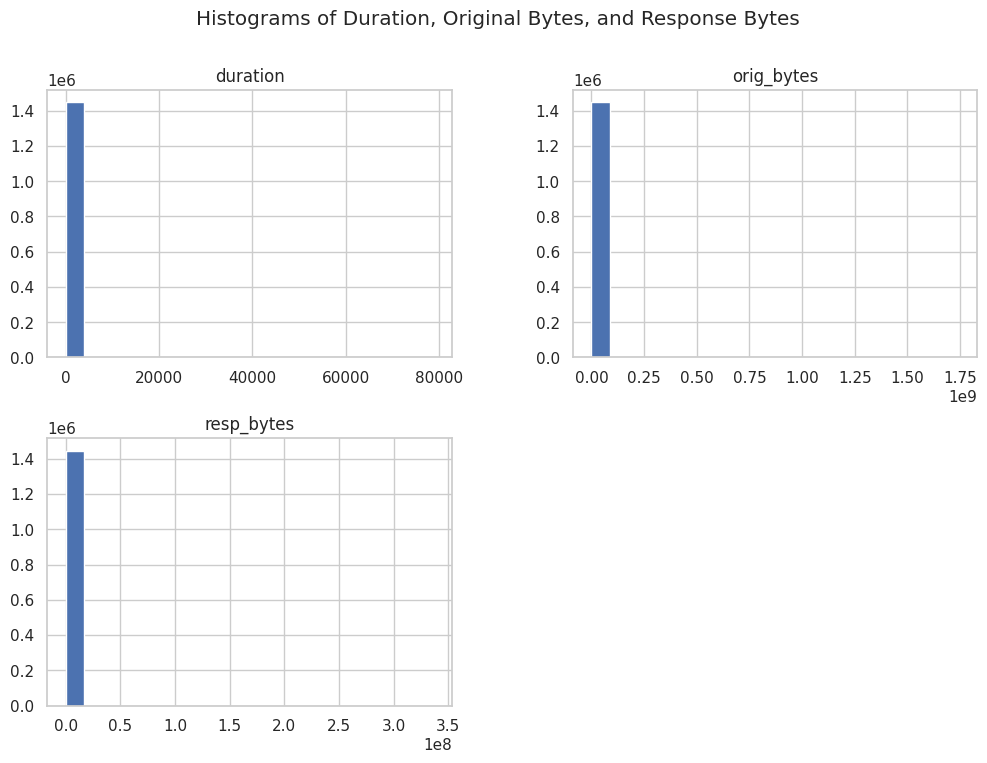

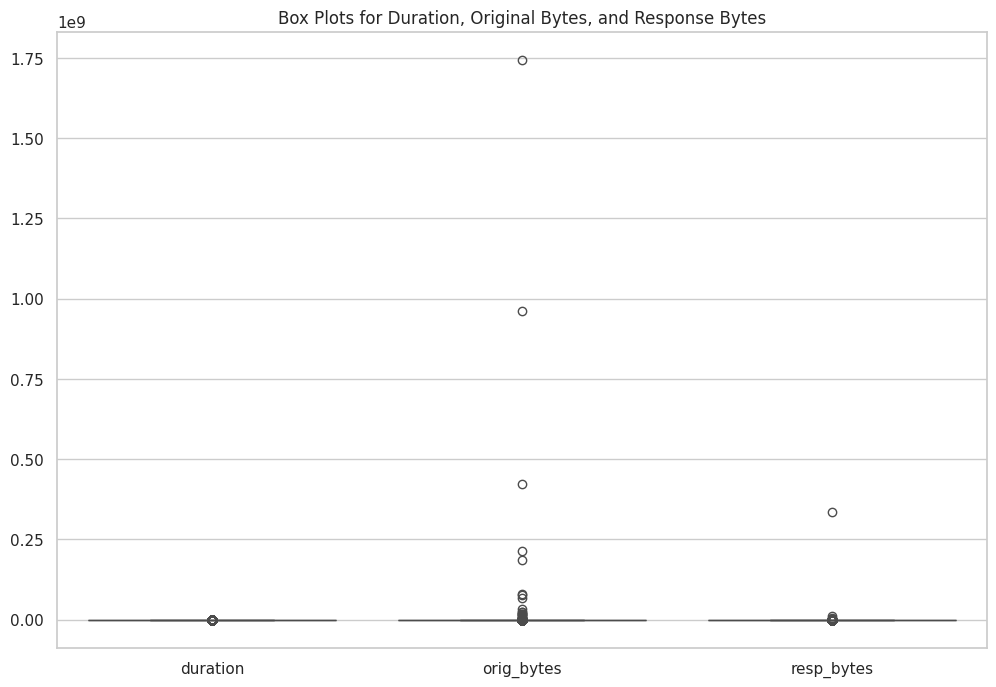

ValueError: could not convert string to float: '192.168.1.132'

<Figure size 1200x800 with 0 Axes>

In [7]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='ts', y='orig_bytes', data=df)
plt.title('Time Series Plot of Original Bytes over Time')
plt.xlabel('Timestamp')
plt.ylabel('Original Bytes')
plt.show()

# Histograms
df[['duration', 'orig_bytes', 'resp_bytes']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Duration, Original Bytes, and Response Bytes')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['duration', 'orig_bytes', 'resp_bytes']])
plt.title('Box Plots for Duration, Original Bytes, and Response Bytes')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [8]:
del df['Unnamed: 0']

In [9]:
df

,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,...,0,0,0,0,0,0,0,1,0,0
1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,...,0,0,0,0,0,0,0,1,0,0
2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,76.0,...,0,0,0,0,0,0,0,1,0,0
4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,76.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446617,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446618,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1446619,1.532526e+09,192.168.100.111,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     825939
Okiru                         262690
-   Benign   -                146275
DDoS                          138777
Benign                         53481
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: count, dtype: int64

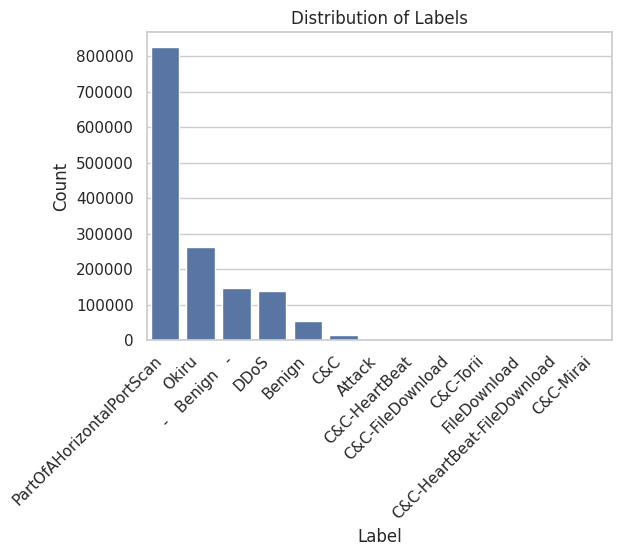

In [11]:
# Plot the count of each label category
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#**ML Models: Decision Tree and Random forest**

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Selecting Features and Target Variable
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

# Decision Tree with Hyperparameter Tuning
param_grid_DT = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

DT = DecisionTreeClassifier(random_state=10)
grid_search_DT = GridSearchCV(DT, param_grid_DT, cv=5, scoring='accuracy')
grid_search_DT.fit(X_train, Y_train)

# Best hyperparameters for Decision Tree
best_params_DT = grid_search_DT.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_DT)

# Prediction and Evaluation for Decision Tree
y_pred_DT = grid_search_DT.predict(X_test)
print("\nDecision Tree Score:", grid_search_DT.score(X_test, Y_test))
print("Classification Report (Decision Tree):")
print(classification_report(Y_test, y_pred_DT))

# Cross-Validation
scores_DT = cross_val_score(grid_search_DT.best_estimator_, X, Y, cv=5)
print("\nCross-Validation Scores (Decision Tree):", scores_DT)

# Random Forest with Reduced Hyperparameter Grid
RF = RandomForestClassifier(random_state=10)
grid_search_RF = GridSearchCV(RF, {}, cv=5, scoring='accuracy')
grid_search_RF.fit(X_train, Y_train)

# Best hyperparameters for Random Forest
best_params_RF = grid_search_RF.best_params_
print("\nBest Hyperparameters for Random Forest:", best_params_RF)

# Prediction and Evaluation for Random Forest
y_pred_RF = grid_search_RF.predict(X_test)
print("\nRandom Forest Score:", grid_search_RF.score(X_test, Y_test))
print("Classification Report (Random Forest):")
print(classification_report(Y_test, y_pred_RF))

# Cross-Validation
scores_RF = cross_val_score(grid_search_RF.best_estimator_, X, Y, cv=5)
print("\nCross-Validation Scores (Random Forest):", scores_RF)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Decision Tree Score: 0.7292525706385553
Classification Report (Decision Tree):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

           -   Benign   -       0.91      0.43      0.58     29108
                   Attack       0.99      0.99      0.99       735
                   Benign       0.97      0.90      0.93     10654
                      C&C       0.84      0.11      0.20      3125
         C&C-FileDownload       0.80      0.67      0.73        12
            C&C-HeartBeat       0.95      0.46      0.62        92
                C&C-Torii       0.00      0.00      0.00         5
                     DDoS       1.00      0.82      0.90     27685
             FileDownload       0.50      1.00      0.67         1
                    Okiru       0.79      0.00      0.00     52493
PartOfAHorizontalPortScan       0.68      1.00      0.81    165415

                 accuracy                           0.73    289325
                macro avg       0.77      0.58      0.58    289325
             weighted avg       0.77      0.73      0.65    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Cross-Validation Scores (Decision Tree): [0.41611682 0.7539817  0.75423746 0.74670266 0.69163291]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Hyperparameters for Random Forest: {}

Random Forest Score: 0.7285578501684956
Classification Report (Random Forest):
                           precision    recall  f1-score   support

           -   Benign   -       0.92      0.42      0.57     29108
                   Attack       1.00      1.00      1.00       735
                   Benign       0.97      0.90      0.93     10654
                      C&C       0.55      0.13      0.21      3125
         C&C-FileDownload       0.92      0.92      0.92        12
            C&C-HeartBeat       0.85      0.43      0.58        92
                C&C-Torii       0.00      0.00      0.00         5
                     DDoS       1.00      0.82      0.90     27685
             FileDownload       0.50      1.00      0.67         1
                    Okiru       0.88      0.00      0.00     52493
PartOfAHorizontalPortScan       0.68      1.00      0.81    165415

                 accuracy                           0.73    289325
   

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Cross-Validation Scores (Random Forest): [0.41758922 0.75211528 0.75268903 0.74568304 0.69185066]


#**ML Model : Gradient Boosting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

# Gradient Boosting without Hyperparameters
GB = GradientBoostingClassifier(random_state=10)
GB.fit(X_train, Y_train)

# Prediction and Evaluation for Gradient Boosting
y_pred_GB = GB.predict(X_test)
print("Gradient Boosting Score:", GB.score(X_test, Y_test))
print("Classification Report (Gradient Boosting):")
print(classification_report(Y_test, y_pred_GB))

#**Deep learning models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Encode the labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_categorical = to_categorical(Y_encoded)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_categorical, random_state=10, test_size=0.2)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the fully connected neural network
model = Sequential()
model.add(Dense(2000, activation='relu', input_shape=(24,)))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy:.4f}')

# Predictions on the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              50000     
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               320400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0

ValueError: ignored

In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test_classes, Y_pred_classes, target_names=label_encoder.classes_[:11]))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                             precision    recall  f1-score   support

            -   Benign   -       1.00      0.00      0.00     29108
                    Attack       0.69      0.98      0.81       735
                    Benign       0.78      0.81      0.79     10654
                       C&C       0.00      0.00      0.00      3125
          C&C-FileDownload       0.00      0.00      0.00        12
             C&C-HeartBeat       0.00      0.00      0.00        92
C&C-HeartBeat-FileDownload       0.00      0.00      0.00         5
                 C&C-Mirai       1.00      0.81      0.90     27685
                 C&C-Torii       0.00      0.00      0.00         1
                      DDoS       0.00      0.00      0.00     52493
              FileDownload       0.65      1.00      0.79    165415

                  accuracy                           0.68    289325
                 macro avg       0.37      0.33      0.30    289325
              weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model with hyperparameters
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(24,)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Print the model summary
ann_model.summary()

# Compile the ANN model with hyperparameters
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model with hyperparameters
ann_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, Y_test))

# Evaluate the ANN model on the test set
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test_scaled, Y_test)
print(f'\nANN Test Accuracy: {ann_test_accuracy:.4f}')

# Predictions on the test set using ANN
ann_Y_pred = ann_model.predict(X_test_scaled)
ann_Y_pred_classes = np.argmax(ann_Y_pred, axis=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               12800     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 13)               

NameError: ignored

In [ ]:
# Classification Report for ANN
print("\nANN Classification Report:\n", classification_report(Y_test_classes, ann_Y_pred_classes, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



ANN Classification Report:
                             precision    recall  f1-score   support

            -   Benign   -       0.43      0.01      0.01     29108
                    Attack       0.41      1.00      0.58       735
                    Benign       0.79      0.87      0.83     10654
                       C&C       0.99      0.04      0.07      3125
          C&C-FileDownload       0.00      0.00      0.00        12
             C&C-HeartBeat       0.00      0.00      0.00        92
C&C-HeartBeat-FileDownload       0.00      0.00      0.00         0
                 C&C-Mirai       0.00      0.00      0.00         0
                 C&C-Torii       0.00      0.00      0.00         5
                      DDoS       1.00      0.81      0.90     27685
              FileDownload       0.00      0.00      0.00         1
                     Okiru       0.00      0.00      0.00     52493
 PartOfAHorizontalPortScan       0.65      1.00      0.79    165415

                 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.